In [ ]:
#From https://learnopencv.com/histogram-of-oriented-gradients/

In [ ]:
#upload bolt.png

In [1]:
import cv2
import numpy as np

In [2]:
#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def my_imshow(title, img ):
  print(title)
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

In [3]:
path = ""
fileName = path + "bolt.png"


#RGB images in BGR order in OpenCV
image = cv2.imread(fileName, cv2.IMREAD_COLOR)

# Print error message if image is null
if image is None:
    print('Could not read image')
else:
    print("Image file read success...")

Image file read success...


Size Before: (235, 113, 3) After:  (128, 64, 3)
Original Image: 


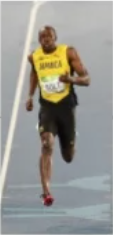

Resized Image: 


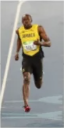

In [4]:
desired_dimension = (64, 128) #width = 64, height = 128.
resized_image = cv2.resize(image, desired_dimension)
print("Size Before:", image.shape, "After: ", resized_image.shape)
my_imshow("Original Image: ", image)
my_imshow("Resized Image: ", resized_image)

In [5]:
float_image = np.float32(resized_image) / 255.0

# Calculate the gradients
Gx = cv2.Sobel(float_image, cv2.CV_32F, 1, 0, ksize=1)
Gy = cv2.Sobel(float_image, cv2.CV_32F, 0, 1, ksize=1)

In [6]:
# Calculate gradient magnitude and direction ( in degrees )
magnitude, angle_degrees = cv2.cartToPolar(Gx, Gy, angleInDegrees=True)
#You can then do the histogram yourself ... it might be easier.

In [7]:
'''
HOG using OpenCV.

win_size – Detection window size. Align to block size and block stride.
block_size – Block size in pixels. Align to cell size. Only (16,16) is supported for now.
block_stride – Block stride. It must be a multiple of cell size.
cell_size – Cell size. Only (8, 8) is supported for now.
nbins – Number of bins. Only 9 bins per cell are supported for now.
win_sigma – Gaussian smoothing window parameter.
threshold_L2hys – L2-Hys normalization method shrinkage.
gamma_correction – Flag to specify whether the gamma correction preprocessing is required or not.
nlevels – Maximum number of detection window increases.
'''
winSize = desired_dimension
blockSize = (16,16) #OpenCV only supports 16 x 16 block sizes
blockStride = (8,8) #multiple of cell size. Here it is multiple of 1.
cellSize = (8,8) #OpenCV only supports 8x8 cell size. That means each Block will have 4 histograms
nbins = 9 #OpenCV only supports 9 orientations per cell.  That means 1 block has 4 x 9 = 36 features
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((0,0),) #we run it at only one location of image (entire image).  Can be used to run at sub-image parts.
hog_feature = hog.compute(resized_image,winStride,padding,locations)
print("HOG feature: \n", hog_feature)
number_of_features = hog_feature.shape
# There are 7 horizontal and 15 vertical blue windows, making a total of 7 x 15 = 105 positions.
# Each 16×16 block is represented by 4 of 8 x 8 blocks. Each block is 9 histogram values.
# Each 16x16 block has 4 x 9 = 36×1 feature vector.
# The feature is a concatenation of 105 such features to get
# a vector of dimension 3,780 from 105 x 36.

print("Number of Features: ", number_of_features)
print("This is from 9 histo values per cell x 4 cells per 16x16 block x (7x15) blocks per image: ", 9*4*7*15)

HOG feature: 
 [0.21293513 0.06494057 0.06108095 ... 0.09353574 0.03860389 0.04361965]
Number of Features:  (3780,)
This is from 9 histo values per cell x 4 cells per 16x16 block x (7x15) blocks per image:  3780
